Prepared by: Mona Alrougi, Sara Al amer, Nourah Almutiri

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
%matplotlib inline
sns.set()
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [ ]:
df=pd.read_csv("/content/marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.shape

(2240, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


**`**Data Preparation** `**


In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country'], dtype='object')

In [ ]:
df[" Income "]=df[" Income "].str.replace("$", "")

<ipython-input-256-650da87e0fe8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[" Income "]=df[" Income "].str.replace("$", "")


In [ ]:
df[" Income "]=df[" Income "].str.replace(",","").astype(float)

In [ ]:
df.rename(columns={" Income ":"Income"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country'], dtype='object')

In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
df['Total_spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Children']=df['Kidhome']+df['Teenhome']
df["Age"]=2024 - df["Year_Birth"]
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')



In [ ]:
nums_1 = ['Income','Children', 'Age', 'Total_spend', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases']
nums_2 = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases']
nums_3 = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

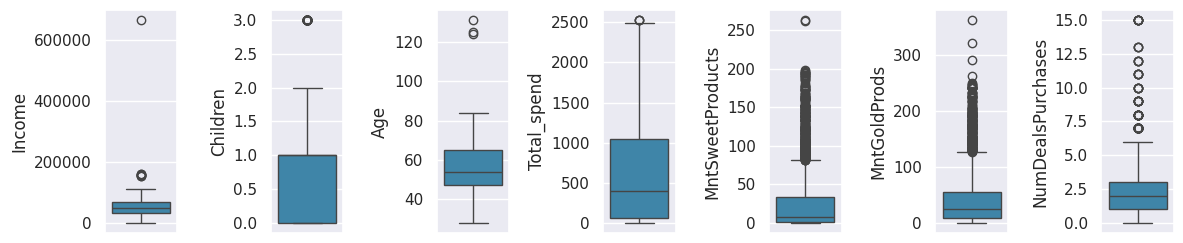

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_1)):
    plt.subplot(2, len(nums_1), i+1)
    sns.boxplot(df[nums_1[i]], color='#2D8BBA')
    plt.tight_layout()

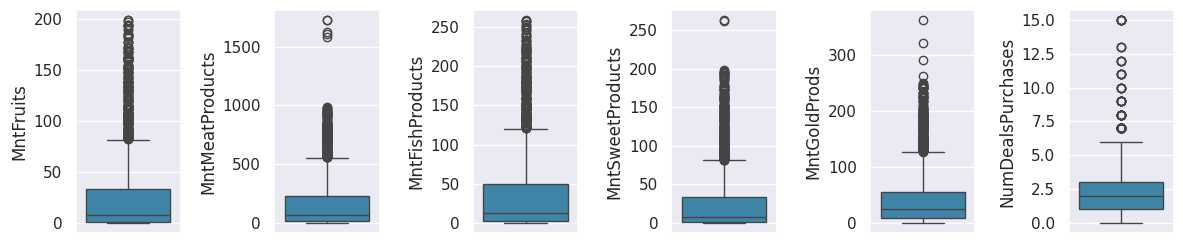

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_2)):
    plt.subplot(2, len(nums_2), i+1)
    sns.boxplot(df[nums_2[i]], color='#2D8BBA')
    plt.tight_layout()

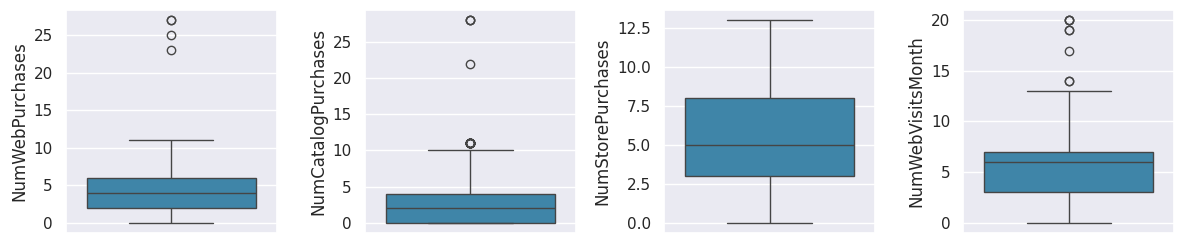

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_3)):
    plt.subplot(2, len(nums_3), i+1)
    sns.boxplot(df[nums_3[i]], color='#2D8BBA')
    plt.tight_layout()

<Axes: >

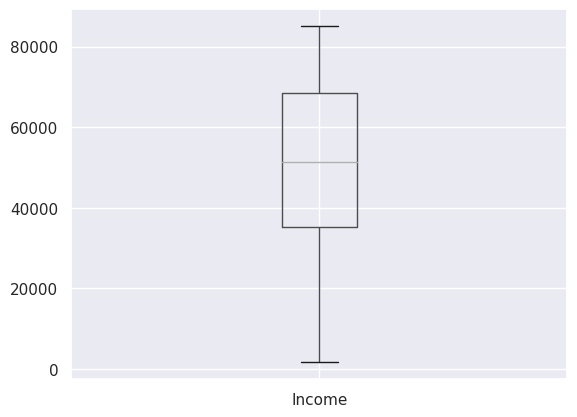

In [ ]:
#Removing outliers from income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Income'].mask(df['Income'] > UB, UB, inplace=True)
df.boxplot('Income')

# df = df.drop(df[df['Year_Birth'] <= 1900].index)
# df = df.drop(df[df['Income'] > 600000].index)

<Axes: >

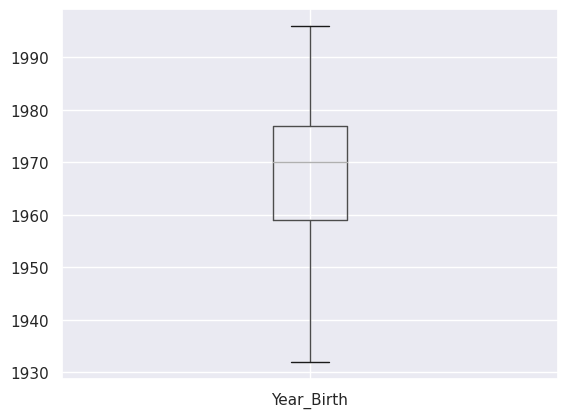

In [ ]:
#Removing outliers from year of birth
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Year_Birth'].mask(df['Year_Birth'] < LB, LB, inplace=True)
df.boxplot('Year_Birth')

In [ ]:
mean=df.Income.mean()
mean

51529.02481949458

In [ ]:
df.Income=df.Income.fillna(mean)

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Total_spend            0
Children               0
Age                    0
dtype: int64

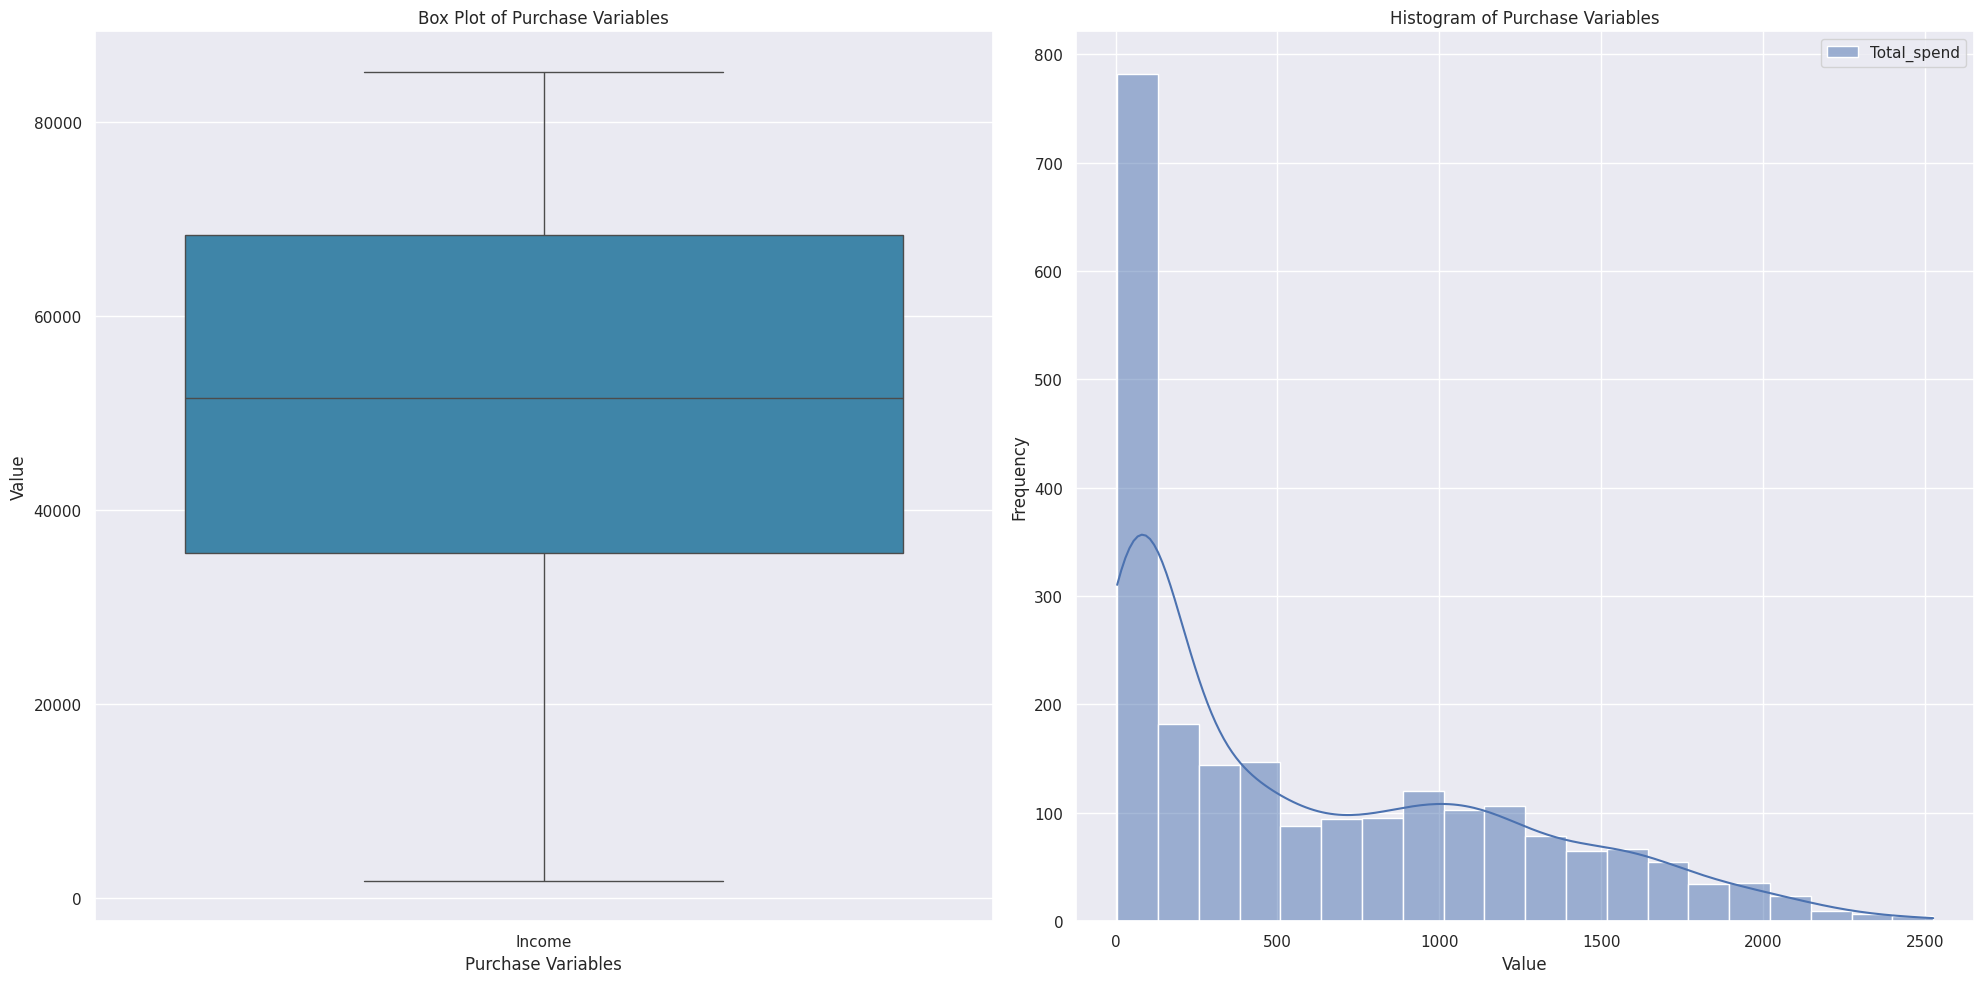

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['Income']], color="#2D8BBA")
plt.title('Box Plot of Purchase Variables')
plt.xlabel('Purchase Variables')
plt.ylabel('Value')

# Histograms
plt.subplot(1, 2, 2)
sns.histplot(data=df[["Total_spend"]], bins=20, kde=True,color="#2D8BBA")
plt.title('Histogram of Purchase Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df.describe().T
# income : we have less outliears

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.500000,8427.75,11191.0
Year_Birth,2240.0,1968.852232,11.771725,1932.0,1959.00,1970.000000,1977.00,1996.0
Income,2240.0,51529.024819,20241.402173,1730.0,35538.75,51529.024819,68289.75,85131.5
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.000000,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.000000,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.000000,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.500000,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.000000,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.000000,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.000000,50.00,259.0


In [ ]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
df.Marital_Status.unique()

array(['Single', 'Relationship'], dtype=object)

<ipython-input-277-7dc20793eaba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Marital_Status", data=df,palette=['#2D8BBA', '#41B8D5'])


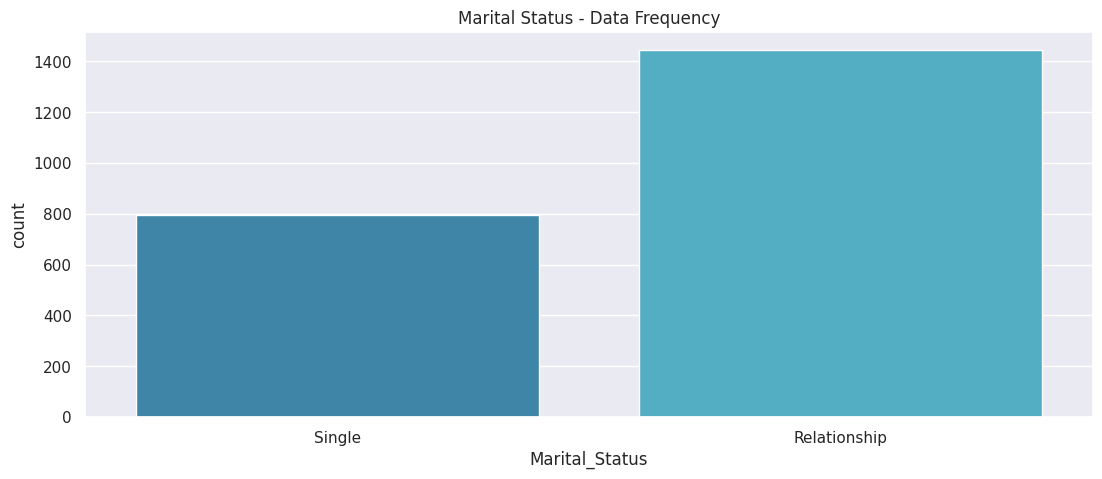

Number of samples According to Marital status 
Relationship    1444
Single           796
Name: Marital_Status, dtype: int64


In [ ]:
# Number of samples according to Marital status
plt.figure(figsize=(13,5))
sns.countplot(x="Marital_Status", data=df,palette=['#2D8BBA', '#41B8D5'])
plt.xticks(rotation = 0)
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of samples According to Marital status \n{df['Marital_Status'].value_counts()}")

In [ ]:
df.Country.unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [ ]:
df.Country.replace({"SP":"Spain","CA":"Canada","US":"United States","AUS":"Australia","GER":"German","IND":"Indian","SA":"Saudi Arabia","ME":"Montenegro"},inplace=True)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_spend,Children,Age
0,1826,1970,Graduation,Single,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain,1190,0,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada,577,0,63
2,10476,1958,Graduation,Relationship,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,United States,251,1,66
3,1386,1967,Graduation,Relationship,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia,11,2,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain,91,1,35


<Axes: >

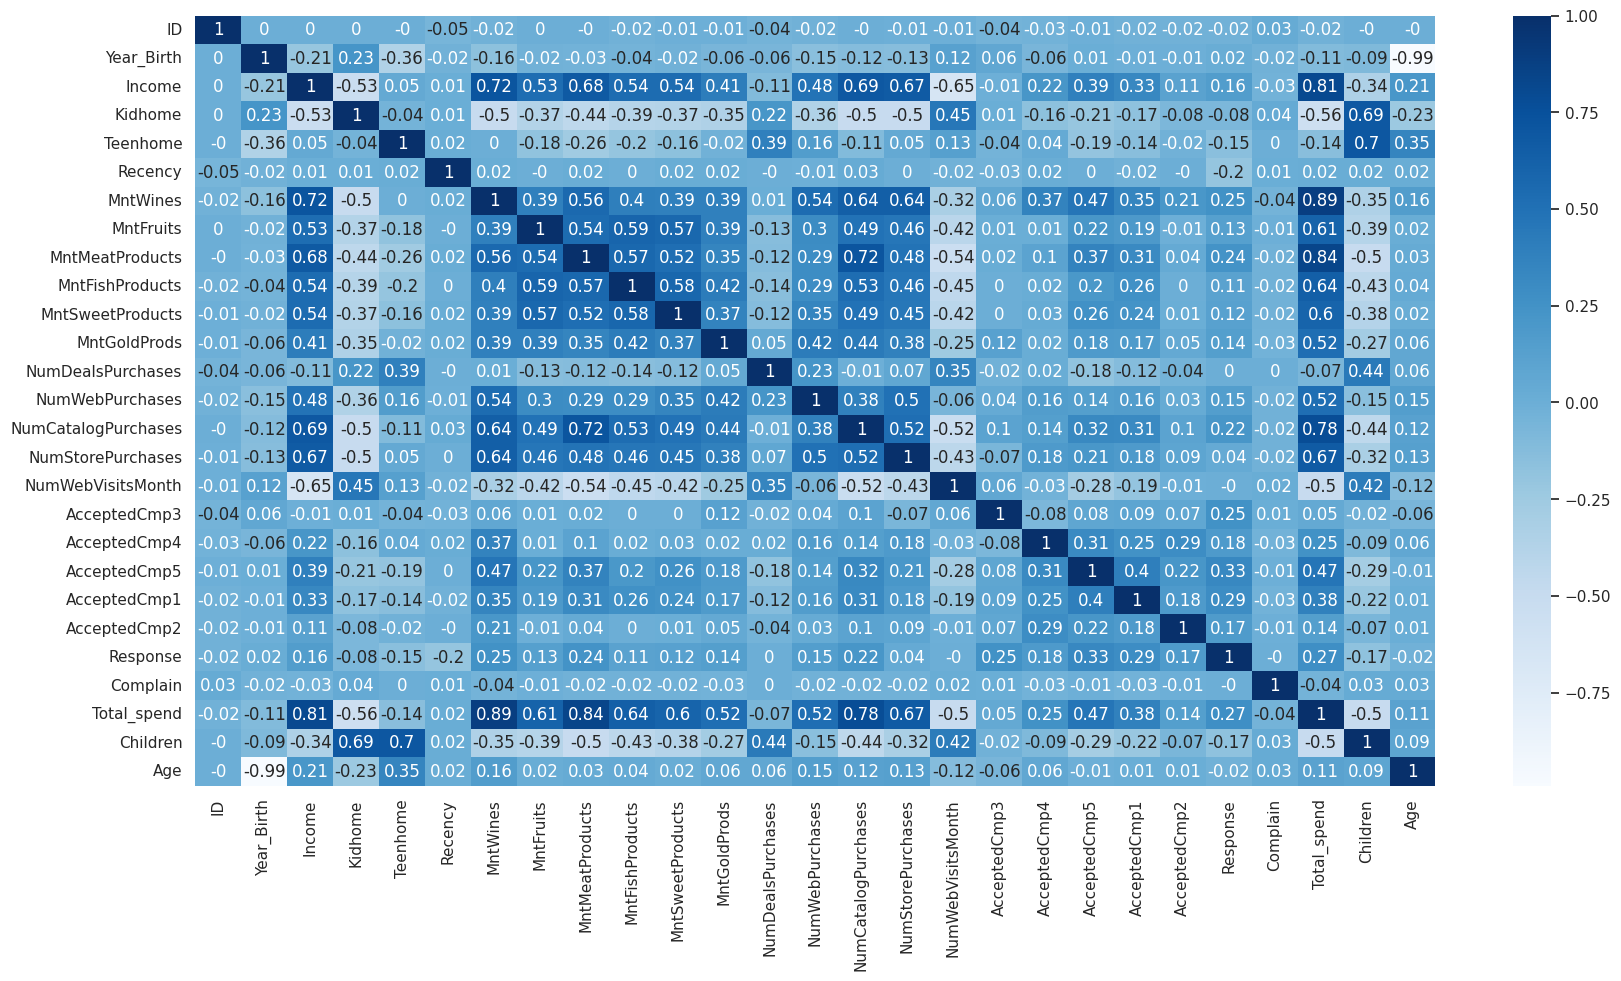

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include='number').corr().round(2),annot=True,cmap="Blues")

<ipython-input-282-f611f62e4986>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  "Total_spend","Complain"]].corr().round(2),annot=True,cmap="Blues")


<Axes: >

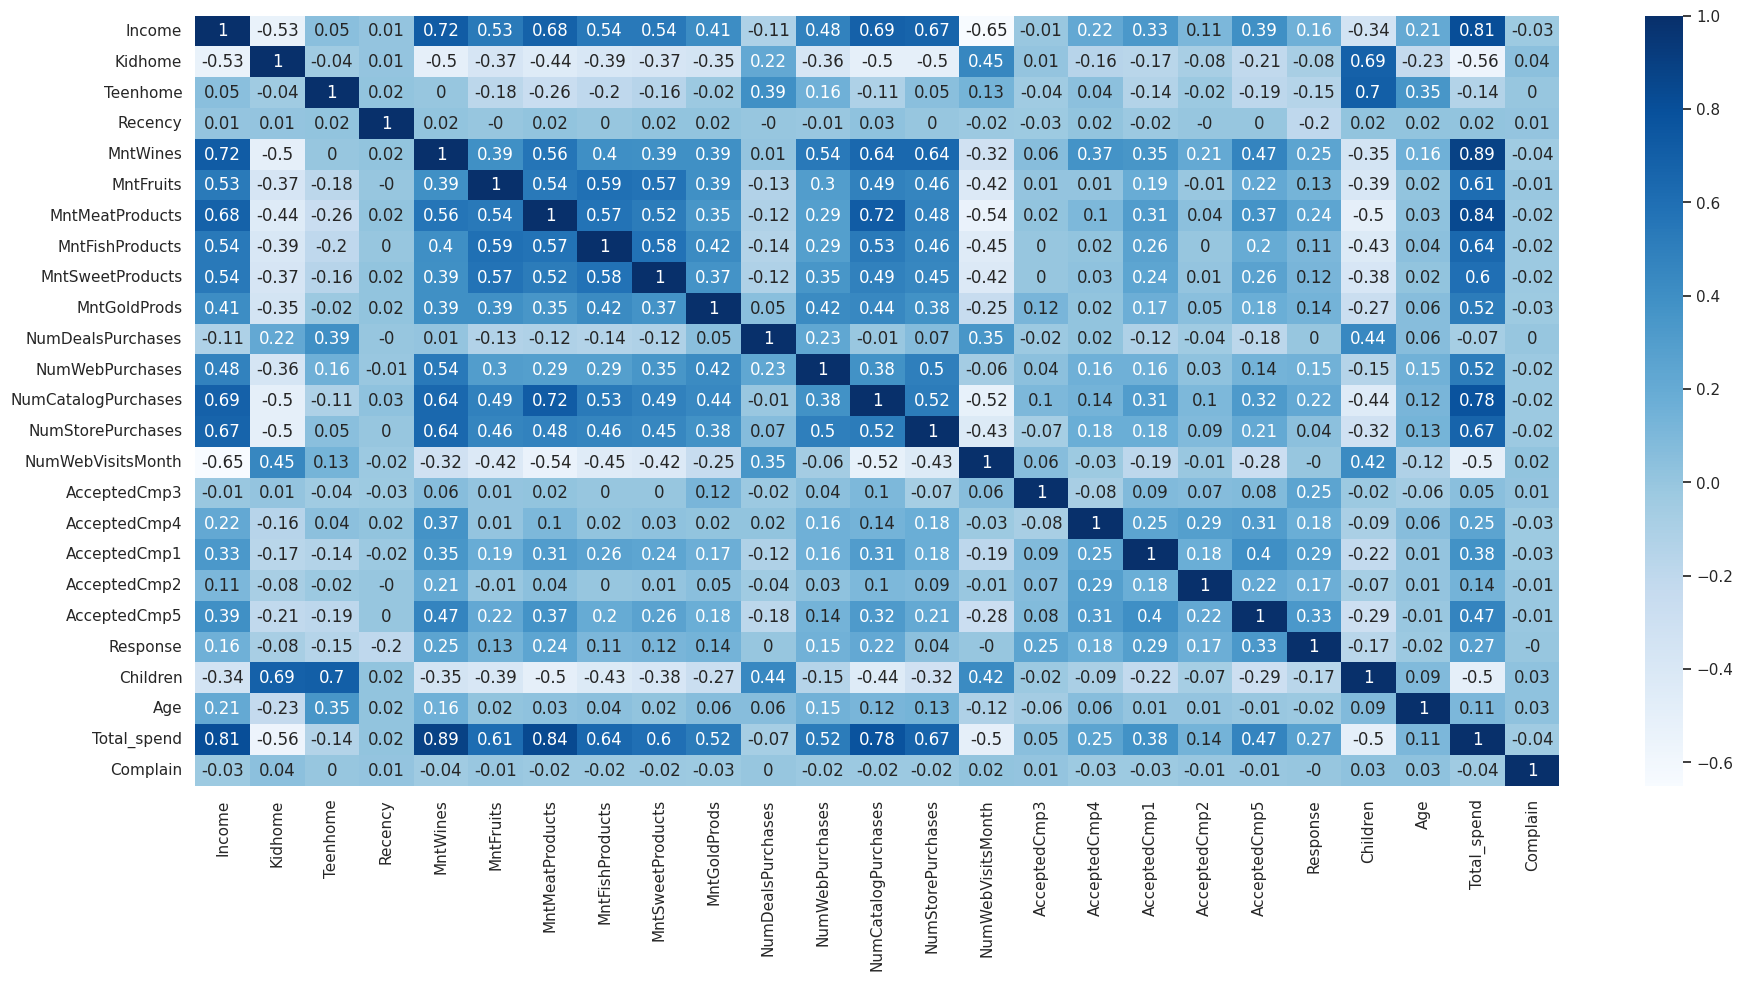

In [ ]:
plt.figure(figsize=(22,10))
sns.heatmap(df[["Income","Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
                "MntGoldProds","NumDealsPurchases",
                "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp1","AcceptedCmp2","AcceptedCmp5","Response","Children","Age","Marital_Status",
                "Total_spend","Complain"]].corr().round(2),annot=True,cmap="Blues")

In [ ]:
df.corr()

<ipython-input-283-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total_spend,Children,Age
ID,1.000000,0.001618,0.000506,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,-0.021968,0.033883,-0.018054,-0.000146,-0.000028
Year_Birth,0.001618,1.000000,-0.214195,0.233327,-0.359414,-0.020039,-0.161284,-0.016134,-0.031155,-0.042358,-0.018988,-0.060248,-0.064649,-0.150248,-0.124070,-0.134416,0.120136,0.061784,-0.062721,0.010965,-0.007071,-0.007117,0.020058,-0.018459,-0.113246,-0.093232,-0.994415
Income,0.000506,-0.214195,1.000000,-0.527781,0.047614,0.007475,0.719040,0.530150,0.678642,0.544011,0.536592,0.409424,-0.114901,0.480456,0.686749,0.672826,-0.647218,-0.013795,0.219553,0.393956,0.326181,0.105594,0.161411,-0.030221,0.812822,-0.343479,0.212088
Kidhome,0.002406,0.233327,-0.527781,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,-0.080008,0.040207,-0.556669,0.689971,-0.230176
Teenhome,-0.002580,-0.359414,0.047614,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,-0.154446,0.003138,-0.138384,0.698433,0.352111
Recency,-0.046524,-0.020039,0.007475,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,-0.198437,0.013231,0.020433,0.018053,0.019871
MntWines,-0.022878,-0.161284,0.719040,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,0.247254,-0.039007,0.891839,-0.351909,0.157773
MntFruits,0.004600,-0.016134,0.530150,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,0.125289,-0.005166,0.614229,-0.394853,0.017917
MntMeatProducts,-0.004437,-0.031155,0.678642,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,0.236335,-0.023483,0.842965,-0.502208,0.030872
MntFishProducts,-0.024475,-0.042358,0.544011,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,0.111331,-0.020953,0.642818,-0.425503,0.041625


**EDA**

In [ ]:
df.Country.value_counts()

Spain            1095
Saudi Arabia      337
Canada            268
Australia         160
Indian            148
German            120
United States     109
Montenegro          3
Name: Country, dtype: int64

In [ ]:
df.Kidhome.value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [ ]:
df.Teenhome.value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [ ]:
df.Children.value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

In [ ]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
df.Marital_Status.value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [ ]:
df.groupby(["Education"])["Income"].mean().sort_values(ascending=False)
# Income in more in Education "PhD"

Education
PhD           55253.710132
Master        52441.884119
Graduation    51838.304590
2n Cycle      47536.492978
Basic         20306.259259
Name: Income, dtype: float64

In [ ]:
df.groupby(["Marital_Status","Education"])["Income"].mean().sort_values(ascending=False)

Marital_Status  Education 
Relationship    PhD           56148.417717
Single          PhD           53691.762992
                Master        52605.500197
Relationship    Master        52357.393849
Single          Graduation    52153.995463
                2n Cycle      51797.077305
Relationship    Graduation    51659.164289
                2n Cycle      45529.696012
                Basic         21663.852941
Single          Basic         17998.350000
Name: Income, dtype: float64

In [ ]:
df.groupby(["Marital_Status","Education"])["MntWines"].sum().sort_values(ascending=False)

Marital_Status  Education 
Relationship    Graduation    207331
                PhD           128427
Single          Graduation    113040
Relationship    Master         77343
Single          PhD            68158
                Master         45895
Relationship    2n Cycle       23277
Single          2n Cycle       16954
Relationship    Basic            332
Single          Basic             59
Name: MntWines, dtype: int64

In [ ]:
df.groupby(["Marital_Status","Education"])["MntWines"].mean().sort_values(ascending=False)

Marital_Status  Education 
Relationship    PhD           415.621359
Single          PhD           385.073446
                Master        364.246032
Relationship    Master        316.979508
                Graduation    288.360223
Single          Graduation    277.058824
                2n Cycle      260.830769
Relationship    2n Cycle      168.673913
                Basic           9.764706
Single          Basic           2.950000
Name: MntWines, dtype: float64

<ipython-input-294-5cc9ebece434>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df,palette=['#2D8BBA','#41B8D5'])
<ipython-input-294-5cc9ebece434>:2: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="Education", data=df,palette=['#2D8BBA','#41B8D5'])


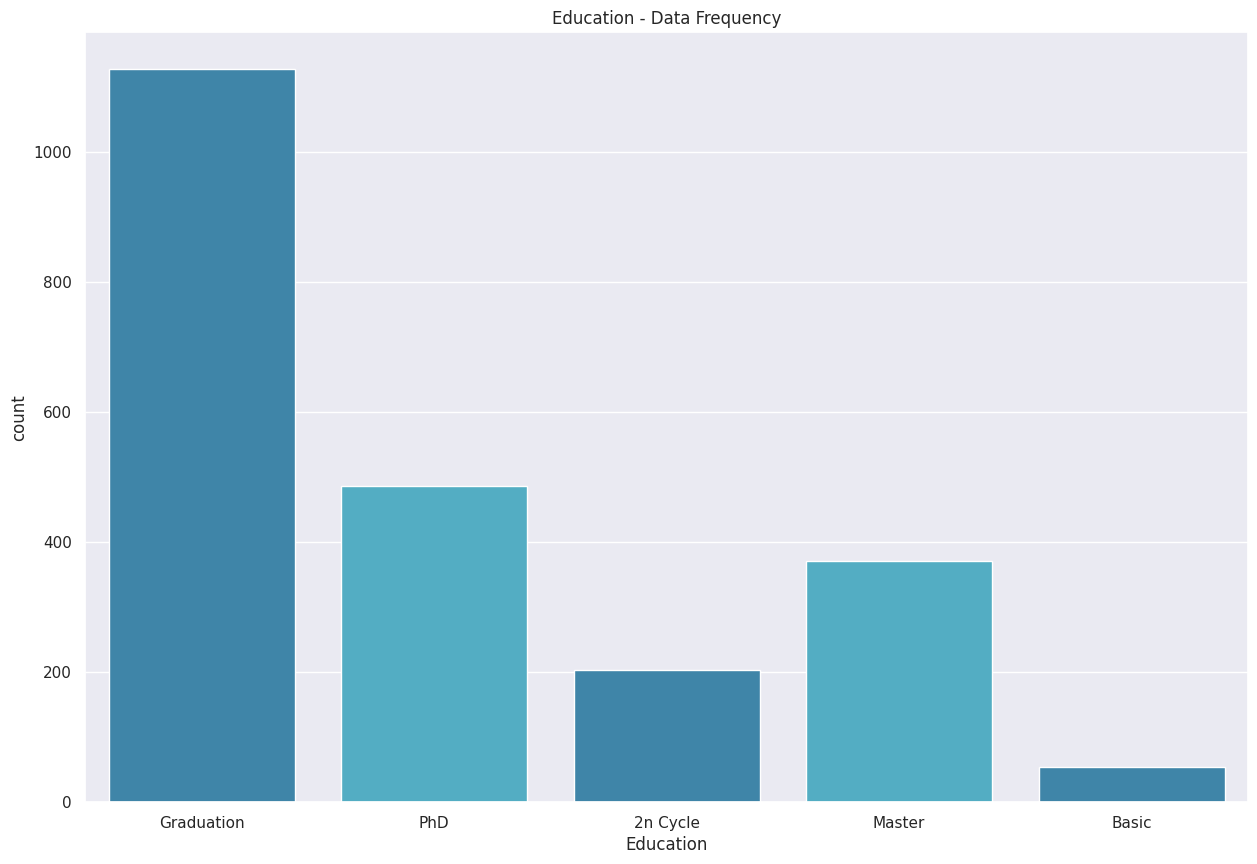

Number of samples According to Education 
Basic           54
2n Cycle       203
Master         370
PhD            486
Graduation    1127
Name: Education, dtype: int64


In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Education", data=df,palette=['#2D8BBA','#41B8D5'])
plt.xticks(rotation = 0)
plt.title("Education - Data Frequency")
plt.show()
print(f"Number of samples According to Education \n{df['Education'].value_counts().sort_values()}")

In [ ]:
#1. Older people are not as tech-savvy and probably prefer shopping in-store.
df_age=df[['Age','NumWebPurchases','NumStorePurchases']]


df_age.loc[(df_age['Age'] >= 50) &(df_age['Age']<=90), 'Age_Group'] = 'Older people'


df_age.head()

<ipython-input-295-59b0938d0b40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.loc[(df_age['Age'] >= 50) &(df_age['Age']<=90), 'Age_Group'] = 'Older people'


,Age,NumWebPurchases,NumStorePurchases,Age_Group
0,54,4,6,Older people
1,63,7,7,Older people
2,66,3,5,Older people
3,57,1,2,Older people
4,35,3,2,NaN


In [ ]:
df_age_plot=df_age[["Age_Group", 'NumWebPurchases','NumStorePurchases']].groupby(["Age_Group"]).mean()

(array([0]), [Text(0, 0, 'Older people')])

<Figure size 2000x1000 with 0 Axes>

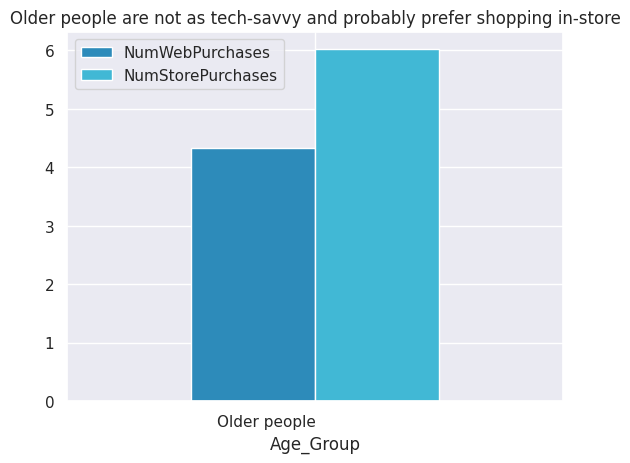

In [ ]:
plt.figure(figsize=(20,10))
df_age_plot.plot.bar(color=['#2D8BBA', '#41B8D5'])
plt.title("Older people are not as tech-savvy and probably prefer shopping in-store")
plt.xticks(rotation=0, ha='right')



In [ ]:
from scipy import stats

# Hypothesis 1: Older people are not as tech-savvy and probably prefer shopping in-store
# Perform t-test for mean number of web purchases between older  age groups
older_group = df[df['Age'] >= 50]['NumWebPurchases']
younger_group = df[df['Age'] < 50]['NumWebPurchases']
t_stat, p_value = stats.ttest_ind(older_group, younger_group)
print("T-statistic for Hypothesis 1:", t_stat)
print("P-value for Hypothesis 1:", p_value)

T-statistic for Hypothesis 1: 5.692905568096004
P-value for Hypothesis 1: 1.4128621355649714e-08


<ipython-input-299-60a47b1f3826>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kids_Presence', y='NumWebPurchases', data=df,palette=['#2D8BBA', '#41B8D5'], estimator=lambda x: x.mean())


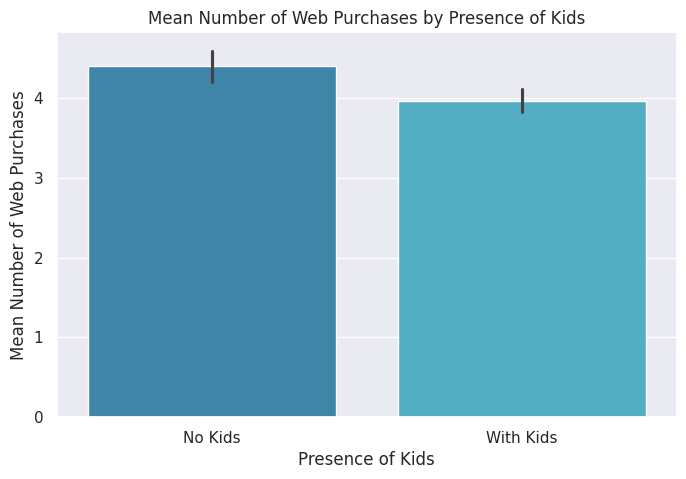

In [ ]:
df['Kids_Presence'] = df.apply(lambda row: 'With Kids' if row['Kidhome'] + row['Teenhome'] > 0 else 'No Kids', axis=1)

# Create a bar plot for mean number of web purchases by presence of kids
plt.figure(figsize=(8, 5))
sns.barplot(x='Kids_Presence', y='NumWebPurchases', data=df,palette=['#2D8BBA', '#41B8D5'], estimator=lambda x: x.mean())
plt.xlabel('Presence of Kids')
plt.ylabel('Mean Number of Web Purchases')
plt.title('Mean Number of Web Purchases by Presence of Kids')
plt.show()

In [ ]:
# Hypothesis 2: Customers with kids probably have less time to visit a store and would prefer to shop online
# Create a column indicating presence of kids
df['Kids_Presence'] = df['Kidhome'] + df['Teenhome']
# Perform t-test for mean number of store purchases between customers with and without kids
with_kids_group = df[df['Kids_Presence'] > 0]['NumStorePurchases']
without_kids_group = df[df['Kids_Presence'] == 0]['NumStorePurchases']
t_stat, p_value = stats.ttest_ind(with_kids_group, without_kids_group)
print("T-statistic for Hypothesis 2:", t_stat)
print("P-value for Hypothesis 2:", p_value)

T-statistic for Hypothesis 2: -14.137654351331781
P-value for Hypothesis 2: 1.5701010302111193e-43


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'NumWebPurchases'),
  Text(1.5, 0, 'NumCatalogPurchases'),
  Text(2.5, 0, 'NumStorePurchases'),
  Text(3.5, 0, 'NumWebVisitsMonth')])

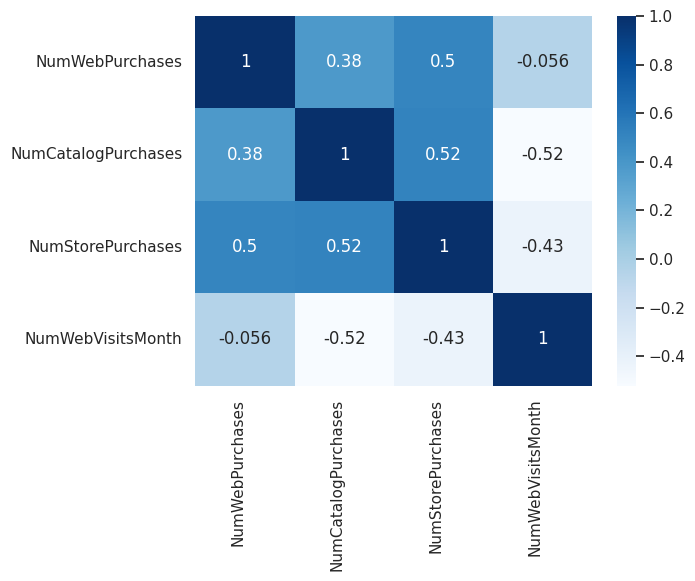

In [ ]:
sns.heatmap(df[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]].corr(),annot=True,cmap="Blues")
plt.xticks(rotation=90, ha='right')

In [ ]:
# Hypothesis 3: Other distribution channels may cannibalize
# Calculate correlations between different distribution channels
distribution_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
correlation_matrix = df[distribution_channels].corr()
print("Correlation matrix for distribution channels:")
print(correlation_matrix)

Correlation matrix for distribution channels:
                     NumWebPurchases  NumCatalogPurchases  NumStorePurchases
NumWebPurchases             1.000000             0.378376           0.502713
NumCatalogPurchases         0.378376             1.000000           0.518738
NumStorePurchases           0.502713             0.518738           1.000000


In [ ]:
totalpurchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Country']]
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country
0,1,4,4,6,Spain


In [ ]:
# Calculate the total number of purchases made through different channels
totalpurchases['TotalPurchases'] = totalpurchases['NumDealsPurchases'] + totalpurchases['NumWebPurchases'] + totalpurchases['NumCatalogPurchases'] + totalpurchases['NumStorePurchases']
totalpurchases.head(1)

<ipython-input-304-e0e6b39e8d60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalpurchases['TotalPurchases'] = totalpurchases['NumDealsPurchases'] + totalpurchases['NumWebPurchases'] + totalpurchases['NumCatalogPurchases'] + totalpurchases['NumStorePurchases']


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country,TotalPurchases
0,1,4,4,6,Spain,15


In [ ]:
average_purchases_per_country = totalpurchases.groupby('Country').agg(Total_Purchases = ('TotalPurchases', 'sum'))
average_purchases_per_country.head(1)

,Total_Purchases
Country,
Australia,2314


In [ ]:
average_purchases_per_country['Total_Customers'] = totalpurchases['Country'].value_counts()
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers
Country,,
Australia,2314,160


In [ ]:
average_purchases_per_country['Purchases_Per_Customer'] = np.floor(average_purchases_per_country['Total_Purchases'] / average_purchases_per_country['Total_Customers'])
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
Australia,2314,160,14.0


In [ ]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('Country'))
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
Australia,2314,160,14.0


In [ ]:
average_purchases_per_country.reset_index(inplace = True)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
0,Australia,2314,160,14.0


In [ ]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'Total_Purchases', ascending = False)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
6,Spain,16052,1095,14.0


Text(0.5, 1.0, 'average_purchases_per_country')

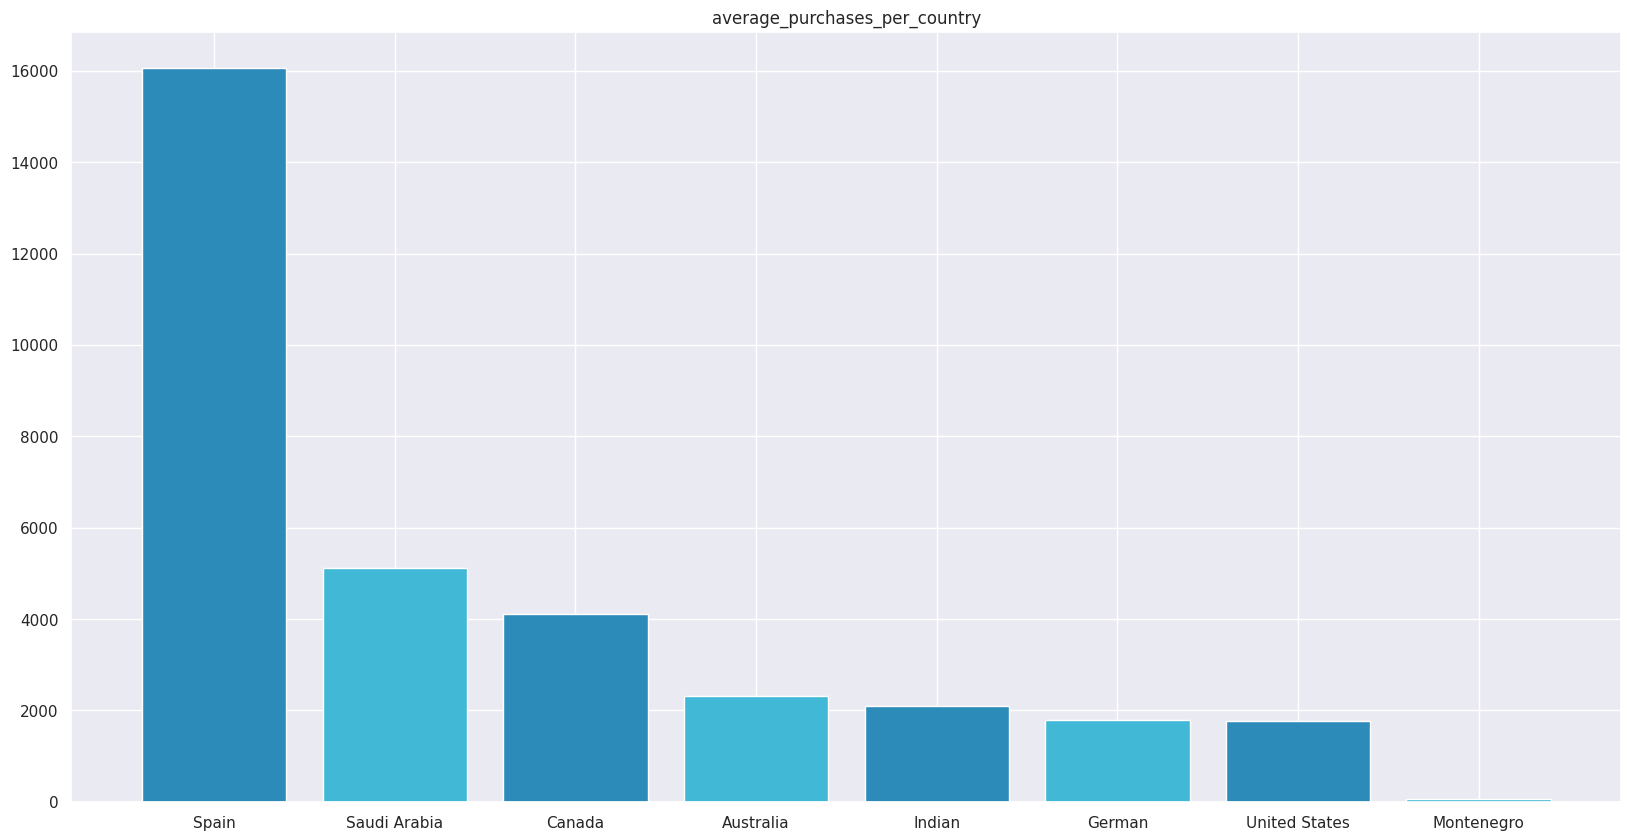

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(x = average_purchases_per_country['Country'],
        height = average_purchases_per_country['Total_Purchases'],color=['#2D8BBA', '#41B8D5'])
plt.title('average_purchases_per_country')


## **Data Visualization**

NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth

Text(0.5, 1.0, 'Sum of NumWebPurchases and NumCatalogPurchasesm and NumStorePurchases')

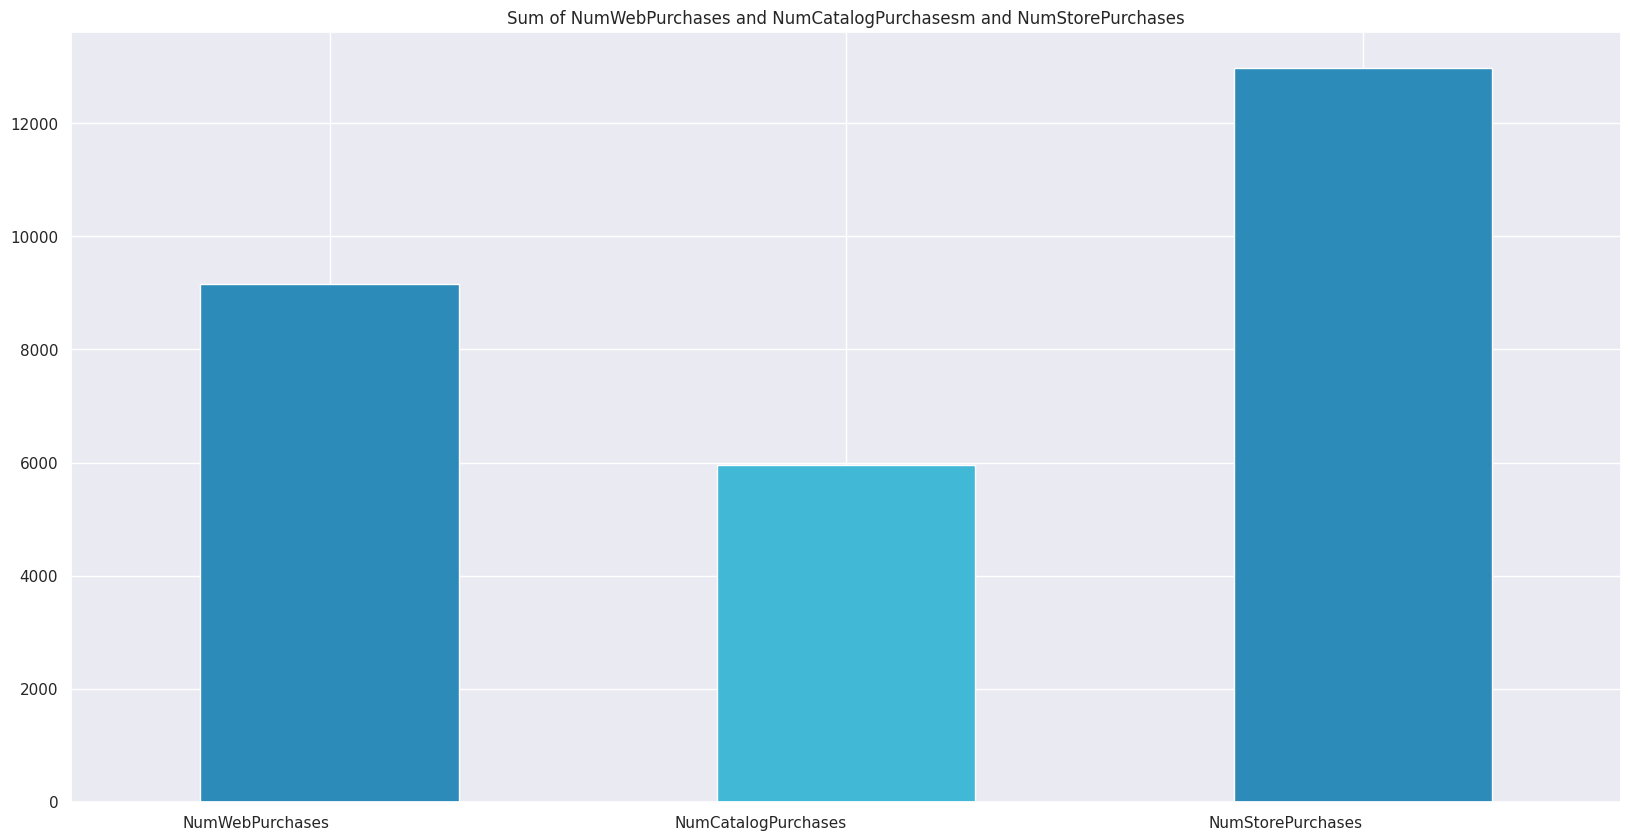

In [ ]:
plt.figure(figsize=(20,10))
df[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]].sum().plot.bar(color=['#2D8BBA', '#41B8D5'])
plt.xticks(rotation=0, ha='right')
plt.title('Sum of NumWebPurchases and NumCatalogPurchasesm and NumStorePurchases')


Text(0.5, 1.0, 'Sum of the Products')

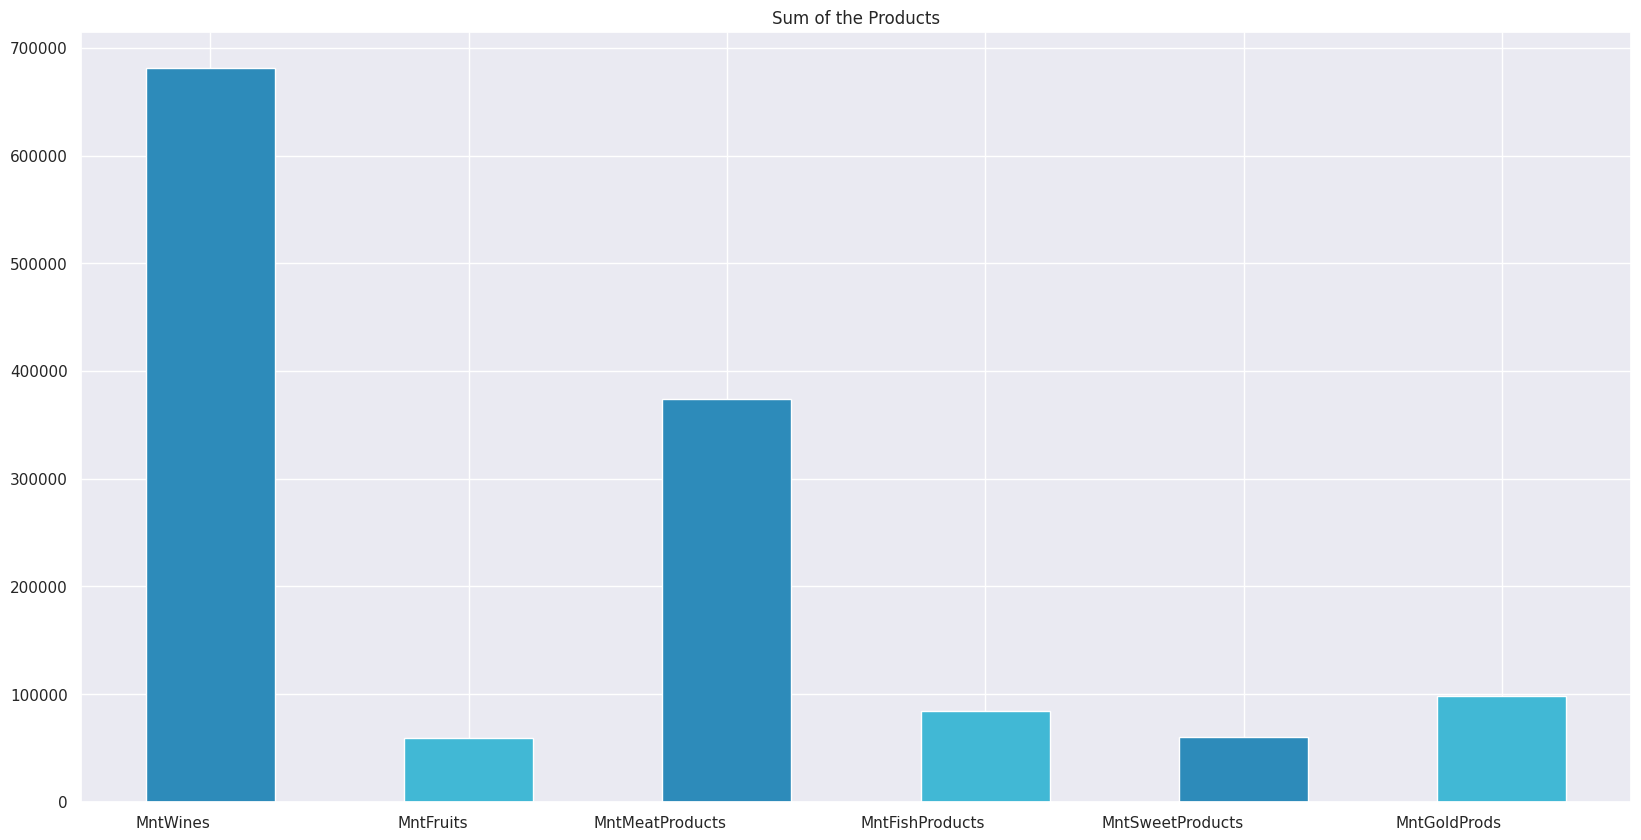

In [ ]:
# products performing the revenue:
plt.figure(figsize=(20,10))
df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum().plot.bar(color=['#2D8BBA', '#41B8D5'])
plt.xticks(rotation=0, ha='right')
plt.title('Sum of the Products')

<Axes: >

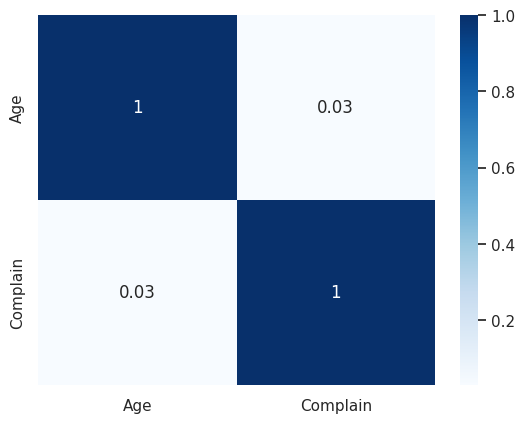

In [ ]:
sns.heatmap(df[["Age","Complain"]].corr(),annot=True,cmap="Blues")

<ipython-input-315-079a16f6a822>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Response', data=country_counts,palette=['#2D8BBA', '#41B8D5'])
<ipython-input-315-079a16f6a822>:9: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Country', y='Response', data=country_counts,palette=['#2D8BBA', '#41B8D5'])


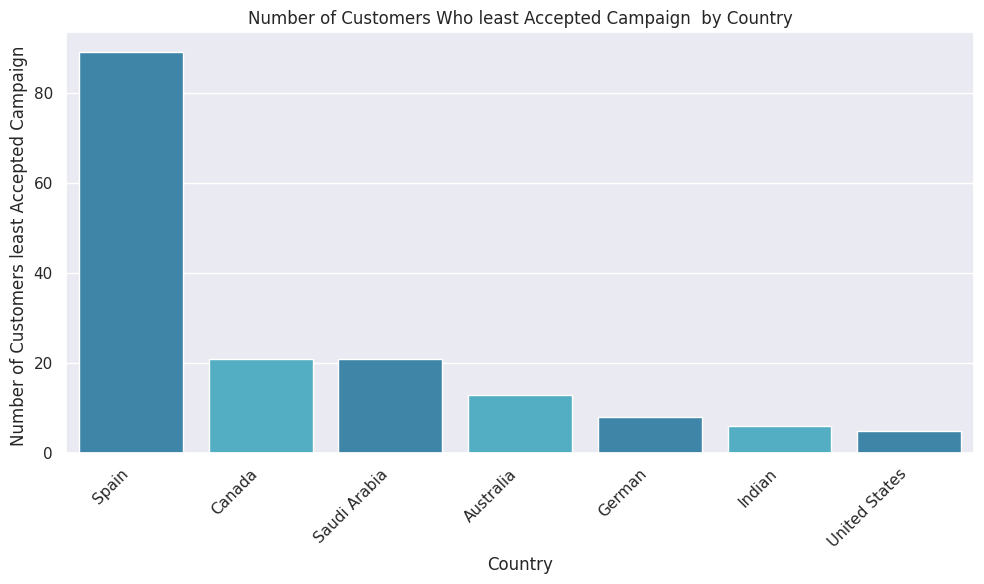

In [ ]:
accepted_campaign_df = df[df['AcceptedCmp5'] == 1]

# Count the occurrences of each country
country_counts = accepted_campaign_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Response']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Response', data=country_counts,palette=['#2D8BBA', '#41B8D5'])
plt.xlabel('Country')
plt.ylabel('Number of Customers least Accepted Campaign ')
plt.title('Number of Customers Who least Accepted Campaign  by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

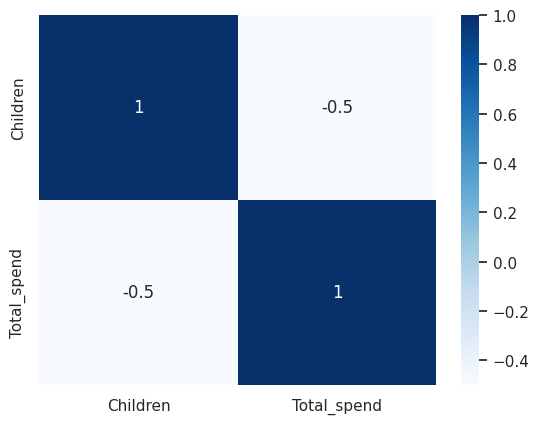

In [ ]:
sns.heatmap(df[["Children","Total_spend"]].corr(),annot=True,cmap="Blues")

In [ ]:
df_Group=df[df["Complain"]==1]
df_Group

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_spend,Children,Age,Kids_Presence
206,10995,1988,2n Cycle,Relationship,15716.0,1,0,2012-11-12,8,16,5,30,8,7,26,3,3,0,4,8,0,0,0,0,0,0,1,Saudi Arabia,92,1,36,1
297,10401,1976,2n Cycle,Relationship,26326.0,0,0,2013-09-04,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,0,1,German,18,0,48,0
355,5726,1983,Master,Single,31788.0,1,0,2014-03-20,15,16,7,23,0,8,6,3,3,0,4,5,0,0,0,0,0,0,1,Saudi Arabia,60,1,41,1
555,9483,1959,Graduation,Relationship,57957.0,0,1,2013-08-19,24,290,59,177,77,5,29,7,4,6,8,3,0,0,0,0,0,0,1,Canada,637,1,65,1
662,10971,1977,Graduation,Single,37774.0,2,0,2012-09-03,28,173,8,107,7,2,176,4,7,2,3,9,1,0,0,0,0,1,1,Spain,473,2,47,2
728,255,1951,Graduation,Single,22263.0,1,1,2014-03-30,31,17,0,2,0,0,2,2,1,0,3,6,0,0,0,0,0,0,1,Spain,21,2,73,2
775,359,1950,Graduation,Relationship,48070.0,0,1,2013-01-13,33,373,14,83,6,9,19,3,8,2,6,7,0,0,0,0,0,0,1,Spain,504,1,74,1
943,3710,1984,PhD,Single,39684.0,1,0,2012-10-12,41,19,0,35,6,4,17,2,2,1,2,7,0,0,0,0,0,1,1,Spain,81,1,40,1
1000,6201,1978,Graduation,Single,38643.0,1,1,2013-11-29,45,22,2,14,0,1,10,2,2,0,3,7,0,0,0,0,0,0,1,Spain,49,2,46,2
1087,7966,1959,Graduation,Single,80982.0,1,1,2013-01-08,48,505,137,401,104,22,22,3,11,5,11,5,0,0,0,0,0,0,1,Spain,1191,2,65,2


In [ ]:
df_Group1=df_Group.groupby("Education").size()
df_Group1

Education
2n Cycle       4
Graduation    14
Master         2
PhD            1
dtype: int64

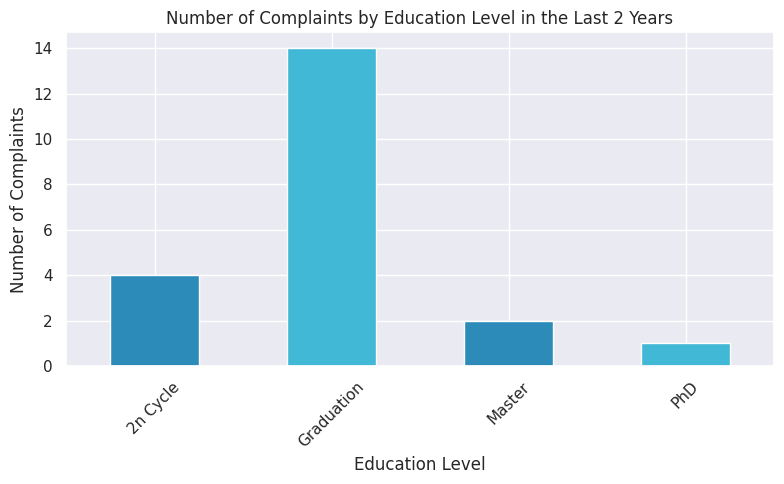

In [ ]:
plt.figure(figsize=(8, 5))
df_Group1.plot(kind="bar",color=['#2D8BBA', '#41B8D5'])
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by Education Level in the Last 2 Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

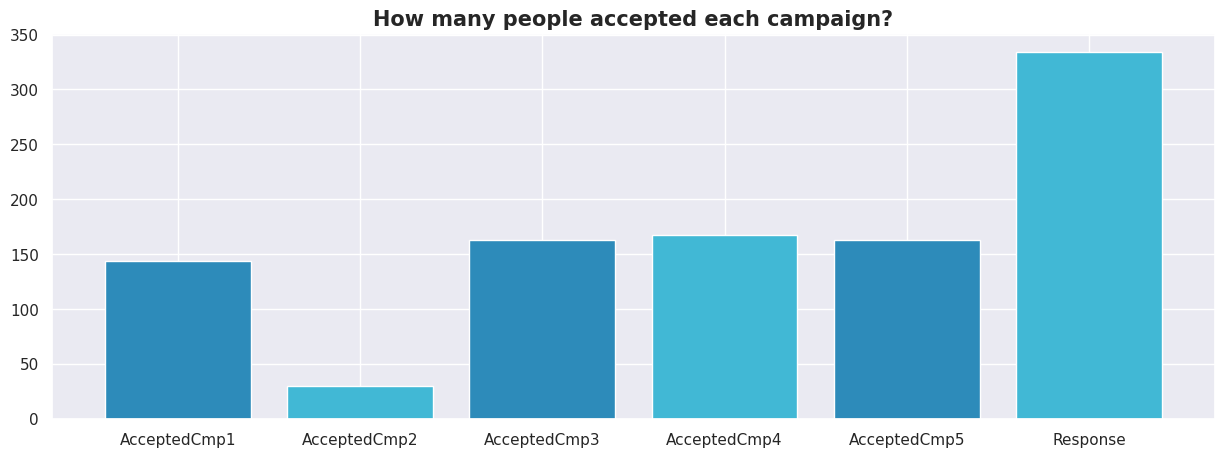

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
fig = plt.figure(figsize=(15,5))
plt.bar(x=campaign_cols,
        height=df[campaign_cols].sum(),color=['#2D8BBA', '#41B8D5'])

plt.title("How many people accepted each campaign?", fontdict={'fontsize':15,'fontweight':'bold'})

plt.show()

# ***Feature Engineer ***

In [ ]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status', 'Country']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

# **Conclusion**

Marital Status and Education:
    * Married customers constitute the highest percentage, followed by unmarried customers.
    * Customers without children represent a higher percentage.
* 		Educational Level:
    * Graduates comprise the highest percentage of customers, followed by PhD and Master's degree holders.
* 		Income:
    * Customers with PhD and Master's degrees have higher incomes and more relationships.
* 		Spending on Wine:
    * Married customers, graduates, and PhD holders spend more on wine.
* 		In-Store Purchases:
    * People aged 50 to 90 are the most frequent in-store purchasers.
* 		Web Purchases:
    * Customers without children are the most frequent web purchasers.
* 		Countries:
    * Spain represents the highest sales percentage.
    * Montenegro represents the lowest sales percentage.
* 		Products:
    * Wine is the top-selling product, while fruits are the least selling.
* 		Purchases:
    * Spain has the highest percentage of Purchases.
    * The US has the lowest percentage of Purchases.
* 		Campaigns:
    * The last two years have seen the highest acceptance rate in campaigns.
    * AcceptedCamp2 witnessed the lowest acceptance rate. **bold text**
